Importamos librerías estandar.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

Primero creamos una ruta de archivo independiente de sistema operativo
para el directorio de este repositorio desde donde los datos serán
obtenidos y donde serán almacenados luego de su transformación.

In [67]:
DATA_DIR = Path(__vsc_ipynb_file__).parents[1].joinpath("data").resolve()
DATA_SRC = DATA_DIR.joinpath("AccidentesAviones.csv").resolve()

Cargamos el DataFrame y le damos un primer vistazo al estado de sus datos.

In [68]:
df = pd.read_csv(DATA_SRC)
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

None

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Si bien el método `info` no nos muestra una gran cantidad de nulos o `NaN`, se puede ver una gran
cantidad de strings del tipo "?", lo que puede considerarse como un nulo de todas maneras, que
interferirá con el análisis y manejo de los datos posteriores.

También se observa que la primera columna es usada como índice del dataset, por lo que puede ser
eliminada.

Ambos problemas pueden ser solucionados con transformaciones simples, o también puede solucionarse
desde el mismo momento de cargar el csv como DataFrame, usando los argumentos `index_col` y `na_values`
de la función `read_csv` de pandas.

In [69]:
df = pd.read_csv(DATA_SRC, index_col=0, na_values="?")
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   HORA declarada          3504 non-null   object 
 2   Ruta                    5003 non-null   object 
 3   OperadOR                4998 non-null   object 
 4   flight_no               1326 non-null   object 
 5   route                   4245 non-null   object 
 6   ac_type                 4995 non-null   object 
 7   registration            4736 non-null   object 
 8   cn_ln                   4341 non-null   object 
 9   all_aboard              4991 non-null   float64
 10  PASAJEROS A BORDO       4787 non-null   float64
 11  crew_aboard             4789 non-null   float64
 12  cantidad de fallecidos  5000 non-null   float64
 13  passenger_fatalities    4773 non-null   float64
 14  crew_fatalities         4773 non-null   float

None

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


Ahora el método `info` nos muestra una mayor cantidad de datos nulos dentro del DataFrame,
que pueden ser manejados más fácilmente ahora que se les reconoce como tales.

Debemos remover algunas columnas que resulten innecesarias, ya sea porque no aportan información
de valor real, o los valores de sus registros son demasiado variados para ser representativos en
una visualización.

Partamos por renombrar las columnas para que tengan más sentido a la hora de visualizar:

In [70]:
df.rename(
    columns={
        "HORA declarada": "hora declarada",
        "Ruta": "ruta",
        "OperadOR": "operador",
        "flight_no": "número de vuelo",
        "route": "tipo vuelo",
        "ac_type": "tipo aeronave",
        "registration": "registro",
        "cn_ln": "número de serie",
        "all_aboard": "total personas a bordo",
        "PASAJEROS A BORDO": "pasajeros a bordo",
        "crew_aboard": "tripulación a bordo",
        "passenger_fatalities": "pasajeros fallecidos",
        "crew_fatalities": "tripulación fallecida",
        "ground": "fallecidos en tierra",
        "summary": "resumen"
    },
    inplace=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   hora declarada          3504 non-null   object 
 2   ruta                    5003 non-null   object 
 3   operador                4998 non-null   object 
 4   número de vuelo         1326 non-null   object 
 5   tipo vuelo              4245 non-null   object 
 6   tipo aeronave           4995 non-null   object 
 7   registro                4736 non-null   object 
 8   número de serie         4341 non-null   object 
 9   total personas a bordo  4991 non-null   float64
 10  pasajeros a bordo       4787 non-null   float64
 11  tripulación a bordo     4789 non-null   float64
 12  cantidad de fallecidos  5000 non-null   float64
 13  pasajeros fallecidos    4773 non-null   float64
 14  tripulación fallecida   4773 non-null   float

Ahora podemos determinar los valores nulos viendo la suma total de éstos
en el DataFrame de la siguiente manera:

In [71]:
df.isna().sum()

fecha                        0
hora declarada            1504
ruta                         5
operador                    10
número de vuelo           3682
tipo vuelo                 763
tipo aeronave               13
registro                   272
número de serie            667
total personas a bordo      17
pasajeros a bordo          221
tripulación a bordo        219
cantidad de fallecidos       8
pasajeros fallecidos       235
tripulación fallecida      235
fallecidos en tierra        44
resumen                     59
dtype: int64

Si bien esta información es válida, no es muy significativa a simple vista,
solo si se toman en cuenta los valores más altos. Hay formas más eficientes
de visualizar esta información, gracias a la librería de Python `missingno`:

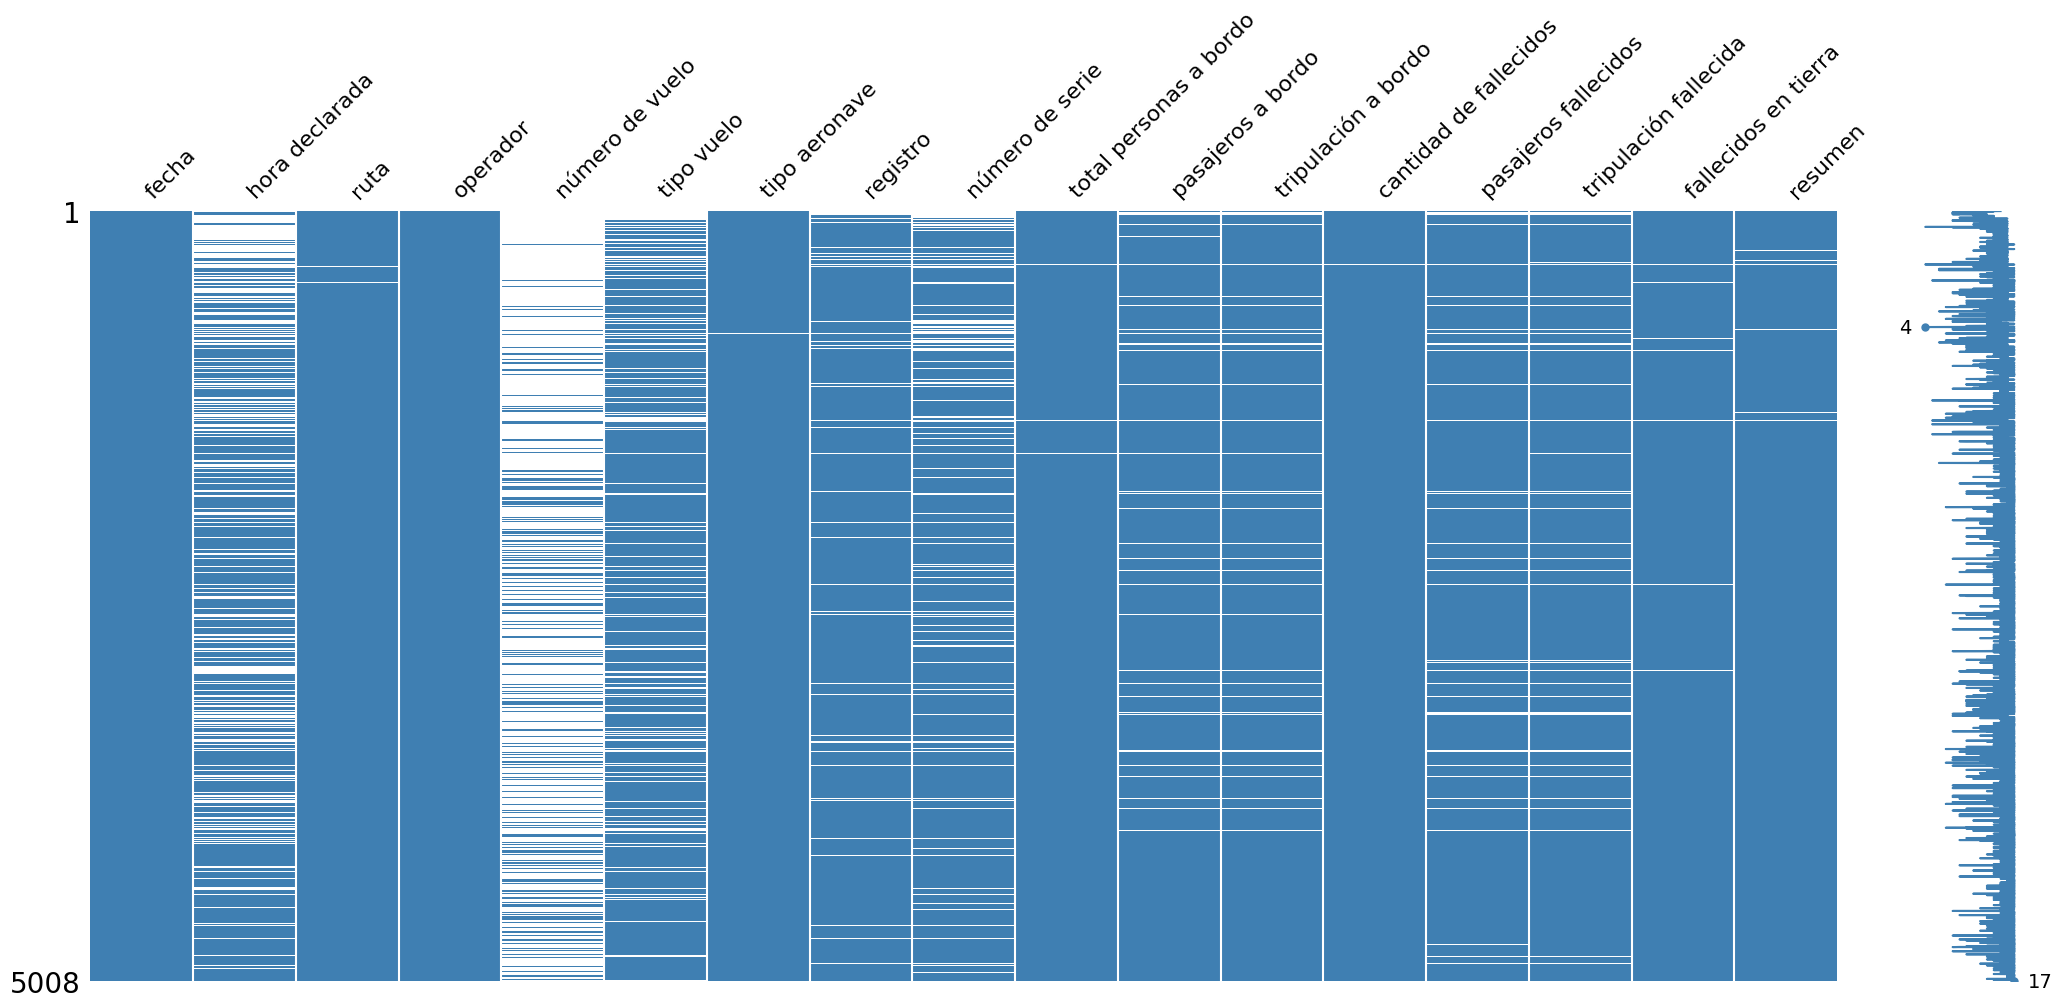

In [72]:
import missingno as msno

msno.matrix(df, color=(0.25, 0.5, 0.7));

El gráfico nos muestra la distribución de los valores nulos dentro del DataFrame,
dejando claro que la columna "número de vuelo" es la que más valores nulos presenta,
seguida de la columna hora declarada.

Con eso en mente, podemos también generar un mapa de calor que nos muestre la correlación
entre los registros de valor numérico:

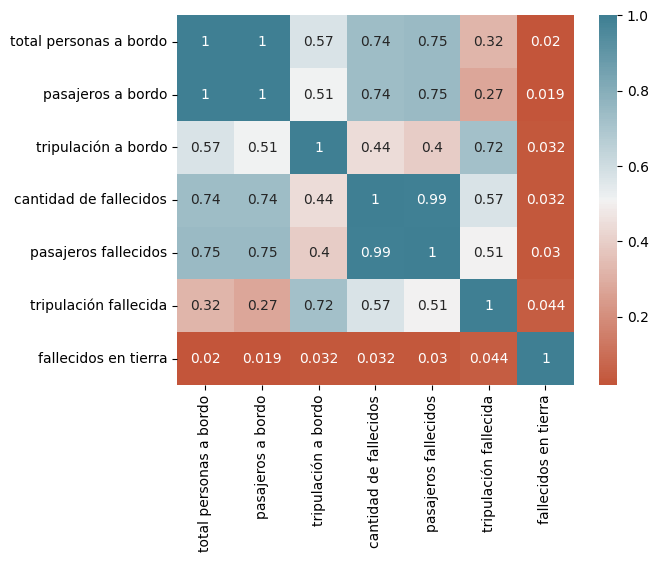

In [73]:
df_numeric = df.loc[:, "total personas a bordo":"fallecidos en tierra"]

sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200)
);

Gracias a esto podemos ver que las columnas "total personas a bordo"
y "pasajeros a bordo" tienen una muy alta correlación, al igual que las
columnas "cantidad de fallecidos" y "pasajeros fallecidos".

Con la información anterior, se puede entonces empezar a eliminar
columnas que puedan resultar innecesarias para el análisis:

In [74]:
df.drop(
    columns=[
        "hora declarada",
        "número de vuelo",
        "registro",
        "número de serie",
        "resumen"
    ],
    inplace=True
)

display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   ruta                    5003 non-null   object 
 2   operador                4998 non-null   object 
 3   tipo vuelo              4245 non-null   object 
 4   tipo aeronave           4995 non-null   object 
 5   total personas a bordo  4991 non-null   float64
 6   pasajeros a bordo       4787 non-null   float64
 7   tripulación a bordo     4789 non-null   float64
 8   cantidad de fallecidos  5000 non-null   float64
 9   pasajeros fallecidos    4773 non-null   float64
 10  tripulación fallecida   4773 non-null   float64
 11  fallecidos en tierra    4964 non-null   float64
dtypes: float64(7), object(5)
memory usage: 508.6+ KB


None

,fecha,ruta,operador,tipo vuelo,tipo aeronave,total personas a bordo,pasajeros a bordo,tripulación a bordo,cantidad de fallecidos,pasajeros fallecidos,tripulación fallecida,fallecidos en tierra
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,"September 07, 1909","Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,"September 09, 1913",Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0


Para el resto de columnas, primero debemos realizar transformaciones estandar
como reemplazar valores `NaN` o cambiar el tipo de datos de algunas columnas.

Solo después de esto podremos realizar exploraciones y sacar conclusiones
significativas de cada una.

También aprovechamos de convertir la columna "fecha" a datetime con la función
`to_datetime` de pandas:

In [75]:
df["fecha"] = pd.to_datetime(df["fecha"])

df.insert(
    loc=1,
    column="año",
    value=df["fecha"].dt.year
)

for col in df_numeric.columns:
    df[col] = df[col].astype(pd.Int16Dtype())
else:
    del col

display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   año                     5008 non-null   int32         
 2   ruta                    5003 non-null   object        
 3   operador                4998 non-null   object        
 4   tipo vuelo              4245 non-null   object        
 5   tipo aeronave           4995 non-null   object        
 6   total personas a bordo  4991 non-null   Int16         
 7   pasajeros a bordo       4787 non-null   Int16         
 8   tripulación a bordo     4789 non-null   Int16         
 9   cantidad de fallecidos  5000 non-null   Int16         
 10  pasajeros fallecidos    4773 non-null   Int16         
 11  tripulación fallecida   4773 non-null   Int16         
 12  fallecidos en tierra    4964 non-null   Int16        

None

,fecha,año,ruta,operador,tipo vuelo,tipo aeronave,total personas a bordo,pasajeros a bordo,tripulación a bordo,cantidad de fallecidos,pasajeros fallecidos,tripulación fallecida,fallecidos en tierra
0,1908-09-17,1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0
1,1909-09-07,1909,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1,0,1,1,0,0,0
2,1912-07-12,1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0
3,1913-08-06,1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1,0,1,1,0,1,0
4,1913-09-09,1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20,<NA>,<NA>,14,<NA>,<NA>,0


Por último vamos a agregar una nueva columna "total fallecidos",
compuesta por la suma de las columnas "cantidad de fallecidos" y
"fallecidos en tierra":

In [76]:
df["total fallecidos"] = df["cantidad de fallecidos"].add(df["fallecidos en tierra"])

display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   año                     5008 non-null   int32         
 2   ruta                    5003 non-null   object        
 3   operador                4998 non-null   object        
 4   tipo vuelo              4245 non-null   object        
 5   tipo aeronave           4995 non-null   object        
 6   total personas a bordo  4991 non-null   Int16         
 7   pasajeros a bordo       4787 non-null   Int16         
 8   tripulación a bordo     4789 non-null   Int16         
 9   cantidad de fallecidos  5000 non-null   Int16         
 10  pasajeros fallecidos    4773 non-null   Int16         
 11  tripulación fallecida   4773 non-null   Int16         
 12  fallecidos en tierra    4964 non-null   Int16        

None

,fecha,año,ruta,operador,tipo vuelo,tipo aeronave,total personas a bordo,pasajeros a bordo,tripulación a bordo,cantidad de fallecidos,pasajeros fallecidos,tripulación fallecida,fallecidos en tierra,total fallecidos
0,1908-09-17,1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,1
1,1909-09-07,1909,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1,0,1,1,0,0,0,1
2,1912-07-12,1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0,5
3,1913-08-06,1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1,0,1,1,0,1,0,1
4,1913-09-09,1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20,<NA>,<NA>,14,<NA>,<NA>,0,14


Guardamos las transformaciones a un archivo csv para acceder
más rápido en el futuro:

In [77]:
df.to_csv(DATA_DIR.joinpath("cleaned_dataset.csv").resolve(), index=False)

Con estas transformaciones hechas, podemos empezar un análisis más en profundidad de los datos.

Partamos por una descripción general del DataFrame:

In [78]:
df.describe()

,fecha,año,total personas a bordo,pasajeros a bordo,tripulación a bordo,cantidad de fallecidos,pasajeros fallecidos,tripulación fallecida,fallecidos en tierra,total fallecidos
count,5008,5008.000000,4991.0,4787.0,4789.0,5000.0,4773.0,4773.0,4964.0,4964.0
mean,1971-05-14 09:57:13.226837072,1970.851637,31.121218,26.877376,4.519524,22.294,18.940708,3.587262,1.718372,24.091257
min,1908-09-17 00:00:00,1908.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1951-05-07 12:00:00,1951.000000,7.0,3.0,2.0,4.0,1.0,2.0,0.0,4.0
50%,1970-09-02 12:00:00,1970.000000,16.0,12.0,4.0,11.0,7.0,3.0,0.0,12.0
75%,1992-03-22 12:00:00,1992.000000,35.0,30.0,6.0,25.0,21.0,5.0,0.0,26.0
max,2021-07-06 00:00:00,2021.000000,644.0,614.0,83.0,583.0,560.0,43.0,2750.0,2842.0
std,NaN,24.703696,45.479965,44.035342,3.758072,35.000385,34.06519,3.177315,55.495544,66.621715


Podemos ver y graficar los 10 años con más fallecidos totales:

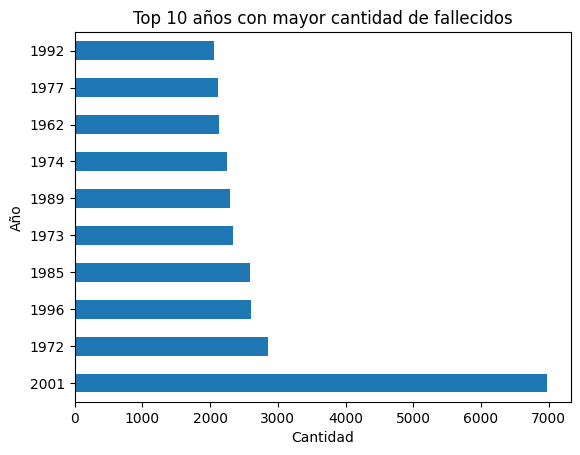

In [79]:
total_fallecidos_anio = df.groupby("año")["total fallecidos"].sum()
total_fallecidos_anio.nlargest(10).plot(
    kind="barh",
    title="Top 10 años con mayor cantidad de fallecidos",
    xlabel="Cantidad",
    ylabel="Año"
);

Esto nos muestra que en el año 2001 hubo una gran cantidad de mortalidad
producto de los accidentes aéreos en comparación al resto de los años.
Esto puede atribuirse a los atentados terroristas ocurridos durante ese
año en Estados Unidos.

Podemos ver la cantidad de fallecidos en los últimos 20 años
presentes en el Dataset:

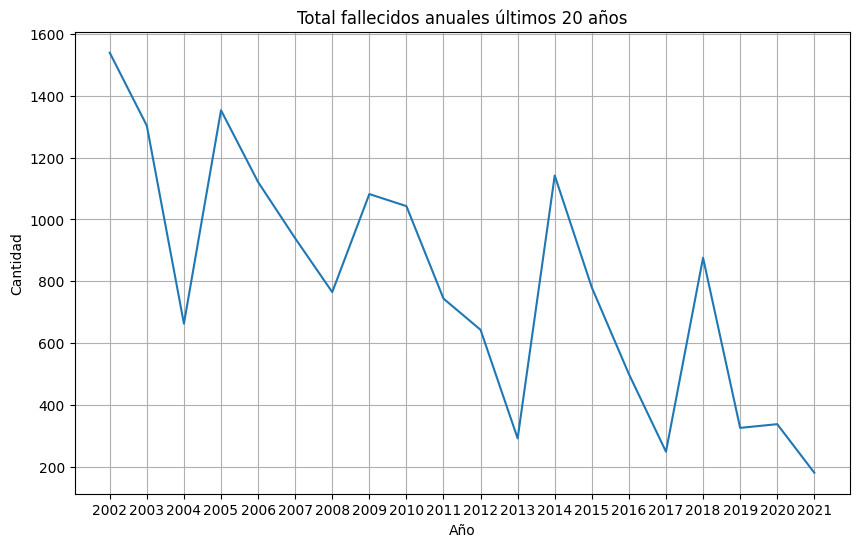

In [80]:
total_fallecidos_anio.tail(20).plot(
    figsize=(10, 6),
    kind="line",
    title="Total fallecidos anuales últimos 20 años",
    grid=True,
    xlabel="Año",
    ylabel="Cantidad",
    xticks=total_fallecidos_anio.tail(20).index
);

Puede observarse que existe una tendencia gradual a disminuir la cantidad
de fallecidos a lo largo de los últimos 20 años, si bien existen casos
donde la cantidad de fallecidos ese año es notablemente mayor comparada
al año anterior.

El KPI principal de este proyecto es "Reducir en 5% la tasa de mortalidad
a nivel anual, siendo el número de fallecidos en los accidentes aéreos respecto
al total de personas en los vuelos involucrados".

Para poder visualizarlo, partamos por usar el siguiente código, tomando
los últimos 20 años como referencia:

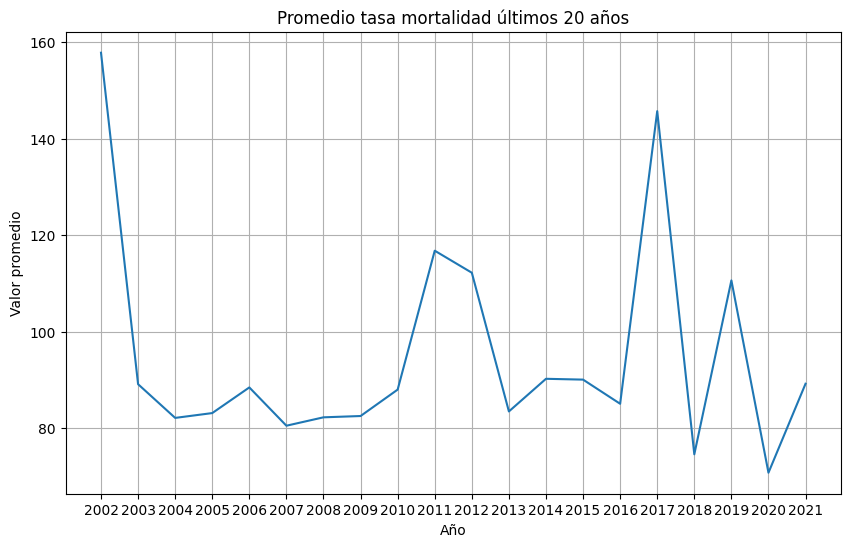

In [85]:
df["tasa mortalidad"] = df["total fallecidos"].div(df["total personas a bordo"]).mul(100)

tasa_mortalidad_anual = df.groupby("año")["tasa mortalidad"].mean().round(2)
tasa_mortalidad_anual.tail(20).plot(
    figsize=(10, 6),
    kind="line",
    title="Promedio tasa mortalidad últimos 20 años",
    grid=True,
    xlabel="Año",
    ylabel="Valor promedio",
    xticks=tasa_mortalidad_anual.tail(20).index
);

Con el código anterior, ya contamos con el promedio de la tasa de mortalidad
anual dentro del DataFrame `tasa_mortalidad_anual`.

Ahora, para comprobar si se cumple nuestro KPI principal, habría que comparar
los valores de cada año con el valor del año anterior, para ver si tales
valores son efectivamente inferiores en un 5%.

Para hacerlo, se puede usar el método `pct_change` de `pandas` en el DataFrame
`tasa_mortalidad_anual`, el cual nos muestra el porcentaje de variación entre
un valor de una Serie de `pandas` y el valor que le antecede:

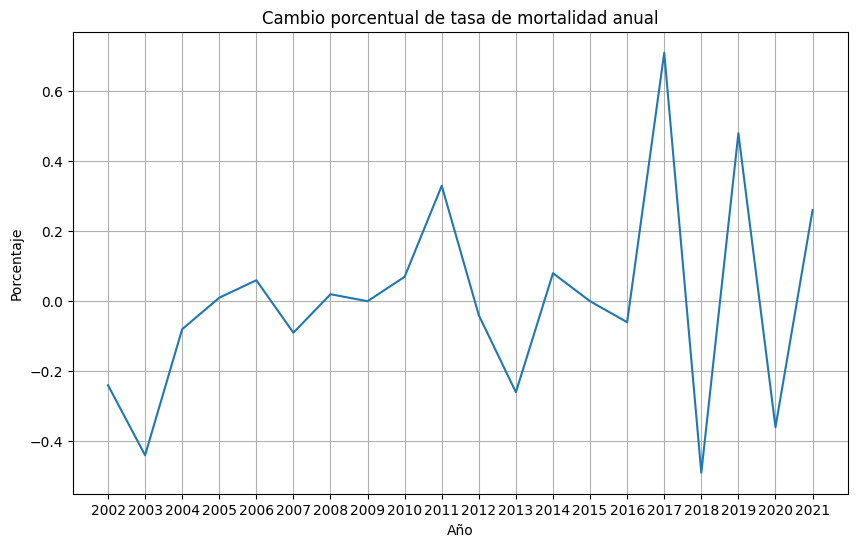

In [90]:
porcent_tasa_mortalidad = tasa_mortalidad_anual.pct_change().round(2).fillna(0.0)
porcent_tasa_mortalidad.tail(20).plot(
    figsize=(10, 6),
    kind="line",
    title="Cambio porcentual de tasa de mortalidad anual",
    grid=True,
    xlabel="Año",
    ylabel="Porcentaje",
    xticks=porcent_tasa_mortalidad.tail(20).index
);

Ahora que tenemos los valores porcentuales de variación entre un año
y el anterior, para evaluar si se cumplió el objetivo, se puede
simplemente realizar la siguiente operación:

In [101]:
all(porcent_tasa_mortalidad[
    (porcent_tasa_mortalidad >= -5)
    & (porcent_tasa_mortalidad <= 0)
])

False

Así se concluye que el KPI principal no fue cumplido.